In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model
import numpy as np
from skimage.transform import resize
import plotly.express as px
import plotly.graph_objs as go

from phdr.data.hoda_dataset_reader import read_hoda_cdb, read_hoda_dataset

2023-01-02 15:46:50.369607: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-02 15:46:50.450731: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-02 15:46:50.453235: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-02 15:46:50.453253: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
np.random.seed(42)

In [3]:
dataset_path = "../data/raw/hoda/"

print('Reading Train 60000.cdb ...')
x_train_org, y_train_org = read_hoda_cdb(dataset_path + 'train_60k.cdb')

print('Reading Test 20000.cdb ...')
x_test_org, y_test_org = read_hoda_cdb(dataset_path + 'test_20k.cdb')

# print('Reading RemainingSamples.cdb ...')
# remaining_images, remaining_labels = read_hoda_cdb(dataset_path + 'remaining_samples.cdb')

Reading Train 60000.cdb ...
Reading Test 20000.cdb ...


In [4]:
print(len(y_train_org))
print(len(y_test_org))

60000
20000


In [5]:
data_ratio = 0.1
x_train = x_train_org[:int(len(x_train_org) * data_ratio)]
y_train = y_train_org[:int(len(y_train_org) * data_ratio)]
x_test = x_test_org[:int(len(x_test_org) * data_ratio)]
y_test = y_test_org[:int(len(y_test_org) * data_ratio)]
print(len(x_train))
print(len(x_test))

6000
2000


In [6]:
# reshape imagesto 5x5
x_train = [resize(image, (5, 5)) for image in x_train]
x_test = [resize(image, (5, 5)) for image in x_test]
x_test[-1].shape

(5, 5)

In [7]:
print(len(x_train))
print(len(x_test))

6000
2000


In [8]:
x_train = np.array(x_train).reshape(len(x_train), 25).astype('float32')
y_train = keras.utils.to_categorical(y_train, 10)
x_test = np.array(x_test).reshape(len(x_test), 25).astype('float32')
y_test = keras.utils.to_categorical(y_test, 10)
print(x_test.shape)
print(y_test.shape)

(2000, 25)
(2000, 10)


In [9]:
x_train /= 255
x_test /= 255

In [10]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1664      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 2,314
Trainable params: 2,314
Non-trainable params: 0
_________________________________________________________________


2023-01-02 15:46:57.903017: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/smbh/venvs/phdr/lib/python3.10/site-packages/cv2/../../lib64:
2023-01-02 15:46:57.903037: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-02 15:46:57.903050: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hope): /proc/driver/nvidia/version does not exist
2023-01-02 15:46:57.903254: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the a

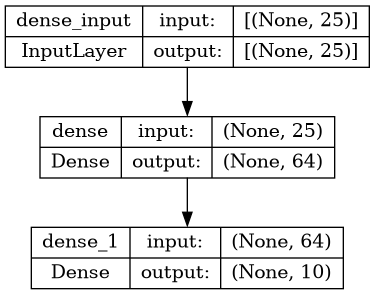

In [11]:
plot_model(model, show_shapes=True)

In [12]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/30
75/75 [==============================] - 0s 2ms/step - loss: 2.3019 - accuracy: 0.1231 - val_loss: 2.3008 - val_accuracy: 0.1000
Epoch 2/30
75/75 [==============================] - 0s 919us/step - loss: 2.3012 - accuracy: 0.1442 - val_loss: 2.3001 - val_accuracy: 0.1000
Epoch 3/30
75/75 [==============================] - 0s 920us/step - loss: 2.3004 - accuracy: 0.1248 - val_loss: 2.2994 - val_accuracy: 0.1092
Epoch 4/30
75/75 [==============================] - 0s 870us/step - loss: 2.2996 - accuracy: 0.1317 - val_loss: 2.2981 - val_accuracy: 0.1000
Epoch 5/30
75/75 [==============================] - 0s 922us/step - loss: 2.2986 - accuracy: 0.1056 - val_loss: 2.2970 - val_accuracy: 0.1000
Epoch 6/30
75/75 [==============================] - 0s 923us/step - loss: 2.2975 - accuracy: 0.1344 - val_loss: 2.2957 - val_accuracy: 0.1850
Epoch 7/30
75/75 [==============================] - 0s 926us/step - loss: 2.2960 - accuracy: 0.1598 - val_loss: 2.2939 - val_accuracy: 0.1858
Epoch 8/

In [14]:
# Plot training & validation accuracy values
fig = go.Figure()
fig.add_trace(go.Scatter(
    y=history.history['accuracy'],
    mode='lines+markers',
    name='Train'
))
fig.add_trace(go.Scatter(
    y=history.history['val_accuracy'],
    mode='lines+markers',
    name='Validation'
))
fig.update_layout(
    title='Model accuracy',
    xaxis_title='Epoch',
    yaxis_title='Accuracy'
)
fig.show()

In [16]:
# Plot training & validation loss values
fig = go.Figure()
fig.add_trace(go.Scatter(
    y=history.history['loss'],
    mode='lines+markers',
    name='Train'
))
fig.add_trace(go.Scatter(
    y=history.history['val_loss'],
    mode='lines+markers',
    name='Validation'
))
fig.update_layout(
    title='Model loss',
    xaxis_title='Epoch',
    yaxis_title='Loss'
)
fig.show()

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

63/63 [==============================] - 0s 725us/step - loss: 1.6886 - accuracy: 0.9610
Test loss: 1.6886122226715088
Test accuracy: 0.9610000252723694


In [17]:
predictions = model.predict(x_test)
print(predictions)
print(y_test)

63/63 [==============================] - 0s 507us/step
[[0.18757512 0.1315717  0.06034597 ... 0.05803552 0.11118213 0.10292459]
 [0.18816015 0.12657636 0.05784811 ... 0.05634086 0.11561512 0.10252289]
 [0.14882915 0.11796934 0.0697042  ... 0.0691516  0.11476654 0.10885901]
 ...
 [0.1688321  0.118644   0.06232376 ... 0.06125105 0.11738744 0.1058844 ]
 [0.21060799 0.14301628 0.04699194 ... 0.04452812 0.11912442 0.10613258]
 [0.15085928 0.13887133 0.07440545 ... 0.07013985 0.10797832 0.10822713]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
